In [5]:
%load_ext autoreload

In [32]:
%autoreload 2
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import matplotlib.pyplot as plt
import glob
import os
import random
from IPython.display import Image
import PIL

In [7]:
e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))

[2018-07-30 21:57:42,624] [TfPoseEstimator] [INFO] loading graph from /Users/rui/vislab-workspace/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


In [13]:
# estimate human poses from a single image !
with open('/Users/rui/Downloads/FDDB-folds/FDDB.txt') as f:
    files_grabbed = [line.rstrip('\n') for line in f]



originalPics/2002/08/21/big/img_267.jpg


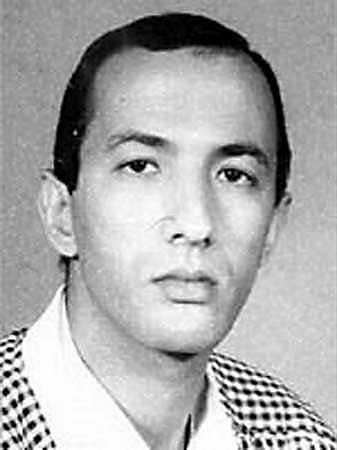

originalPics/2003/01/17/big/img_88.jpg


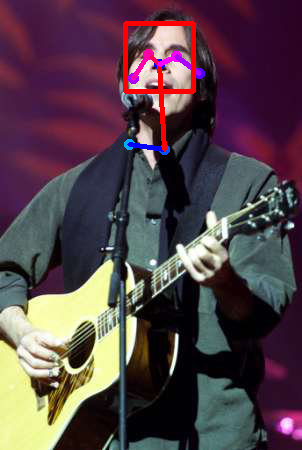

In [302]:
i = random.randint(0,len(files_grabbed))
path = 'originalPics/'+files_grabbed[i]+'.jpg'
image = common.read_imgfile(path, None, None)
print(path)
humans = e.inference(image, resize_to_default=(432 > 0 and 368 > 0),
                             upsample_size=4)
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=True)
PIL.Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [205]:
img_h, img_w = image.shape[:2]
faces = [human.get_face_box(img_w, img_h) for human in humans]
faces = [face for face in faces if face is not None and face['h'] > 10]

In [21]:
print(faces)

[{'x': 147, 'y': 347, 'w': 56, 'h': 56, 'confidence': 0.5277526676654816}, {'x': 156, 'y': 248, 'w': 48, 'h': 48, 'confidence': 0.7239463627338409}]
